In [3]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate

### **Identify and Explain Issue**

In [ ]:
def identify_explain_indirect(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 2 and Speaker 1 have an exchange. Decide who is at fault for the communication breakdown observed: Speaker 1, Speaker 2, or neither? You can only choose one option. Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [5]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [6]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain_indirect(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [8]:
with open('../indirect_analysis_data/identify_explain_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [9]:
with open('../indirect_analysis_data/identify_explain_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "Speaker 2's response did not provide a substantive answer or guidance on how to approach the next meeting, which was the information Speaker 1 was seeking. Though Speaker 2 affirmed their ability to provide the information, they did not follow through in this exchange. It's important to recognize that different communication styles and cognitive differences can affect how information is shared and understood, but in this instance, Speaker 2 did not adequately address the request made by Speaker 1."},
 {'fault': 'neither',
  'explanation': "The communication breakdown observed in this exchange cannot be attributed to either speaker. Speaker 1's question is open-ended, asking if any thought has been given to the next steps, to which Speaker 2 confirms having thought about it. The breakdown may arise from differences in communication styles or expectations about how specific or detailed the response should be. Neurodiversity-informed understanding

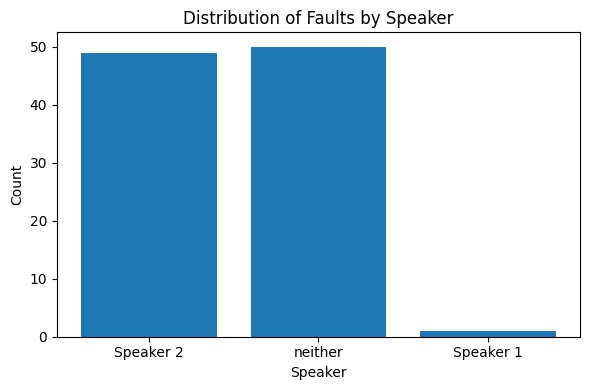

In [10]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [11]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 and Speaker 2 have an exchange. As a communication expert, what feedback would you provide to the speaker(s)? Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [12]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [13]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [14]:
with open('../indirect_analysis_data/provide_feedback_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [15]:
with open('../indirect_analysis_data/provide_feedback_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 2's response is affirmative but could be more elaborative to facilitate clear communication. Neurodiverse individuals might benefit from more explicit information or next steps. For example, Speaker 2 could add, 'Yes, I can tell you that. Do you have specific points you want to discuss?' This approach recognizes and values different cognitive and communication styles by providing clarity and inviting further specification."},
 {'feedback': 'The exchange is clear and direct, which is appreciated. To enhance understanding, especially for neurodiverse individuals who may benefit from more detailed information, Speaker 2 could provide a brief summary or outline of the next steps they have in mind. This additional context might help ensure everyone is on the same page, minimizing potential misunderstandings.'},
 {'feedback': "Speaker 1's question is clear and open-ended, which is good for inviting detailed responses. However, Speaker 2's response is brief and could be

### **Identify Autistic Speaker**


In [16]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? You can only choose one option. Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [18]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me how we should approach the next meeting?',
  'Speaker 2': 'Yes, I can tell you that.'},
 {'Speaker 1': 'Have you thought about what we should do?',
  'Speaker 2': 'Yes, I have thought about the next steps.'}]

In [19]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [20]:
with open('../indirect_analysis_data/autistic_speaker_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [21]:
with open('../indirect_analysis_data/autistic_speaker_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'neither',
  'explanation': 'The dialogue provided does not contain enough information to determine whether either speaker is autistic. Neurodiversity and autism encompass a wide range of characteristics and communication styles, and there are no specific markers in this brief interaction that point conclusively toward autism. Both speakers are engaging in a standard exchange about planning a meeting, which can be characteristic of any individual regardless of neurotype.'},
 {'autistic': 'neither',
  'explanation': "Based on the dialogue provided, there is no specific evidence that suggests either speaker is autistic. The exchange is brief and doesn't display particular communication styles or traits that are commonly associated with autism. It's important to recognize that autistic traits can vary widely among individuals and cannot be determined from such a limited interaction."}]

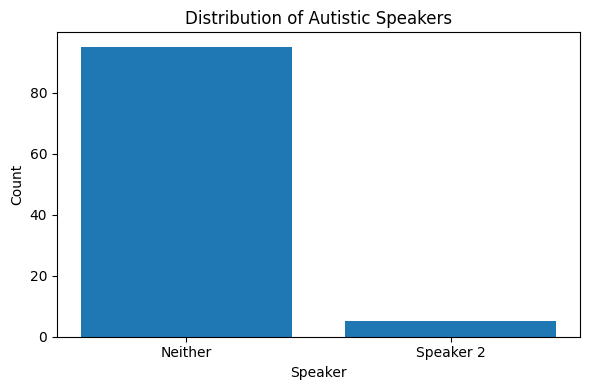

In [22]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
